<a href="https://colab.research.google.com/github/Kangin-Lee/ML_Example/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
!pip install mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

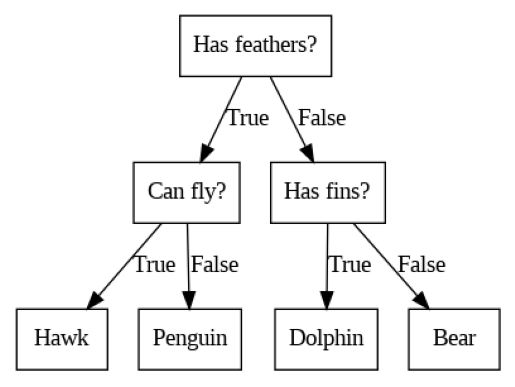

In [174]:
mglearn.plots.plot_animal_tree()

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test,y_train, y_test= train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련세트 정확도: 1.000
테스트세트 정확도: 0.937


In [176]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [177]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"], feature_names=cancer.feature_names, impurity=False, filled=True)

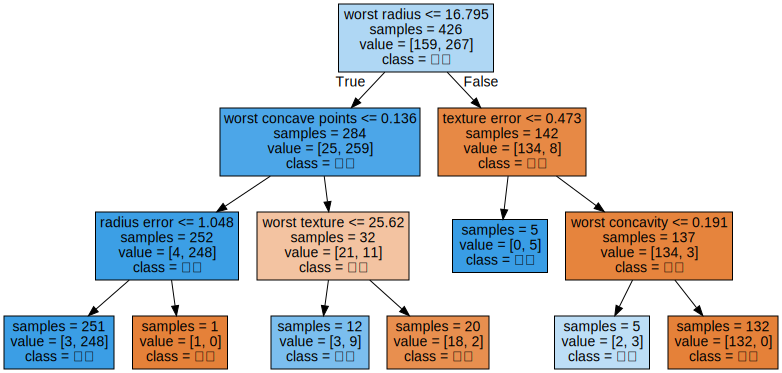

In [178]:
import graphviz

with open("tree.dot")as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

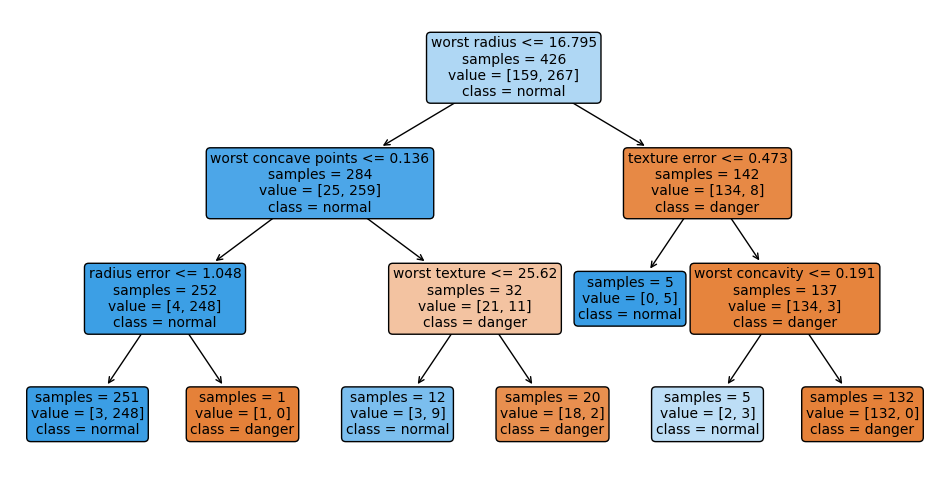

In [179]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree, class_names=["danger","normal"], feature_names=cancer.feature_names, impurity=False, filled = True, rounded =True, fontsize=10)
plt.show()

In [180]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01063382 0.0504697
 0.         0.         0.         0.         0.         0.
 0.         0.         0.75793681 0.03465357 0.         0.
 0.         0.         0.01896644 0.12733965 0.         0.        ]


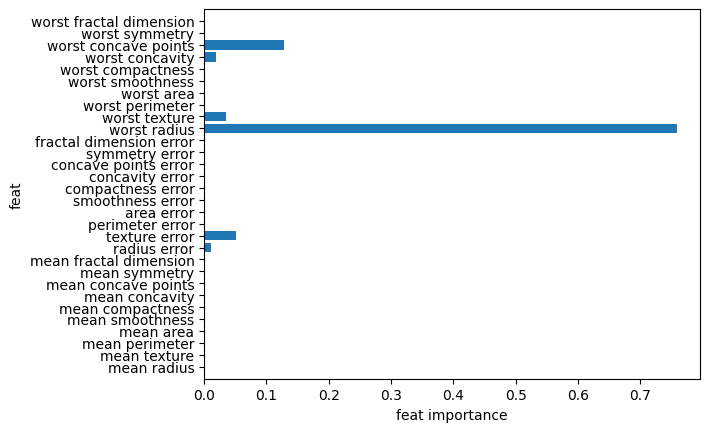

In [181]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features),model.feature_importances_, align = "center") #바를 그려라.
  plt.yticks(np.arange(n_features), cancer.feature_names) # y 눈금
  plt.xlabel("feat importance")
  plt.ylabel("feat")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


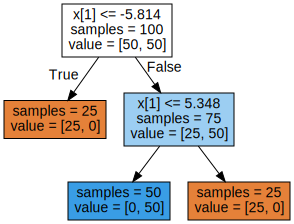

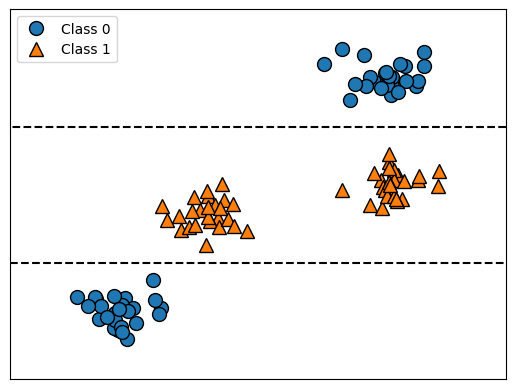

In [182]:
mglearn.plots.plot_tree_not_monotone()

Text(0, 0.5, '가격 ($/Mbyte)')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANG

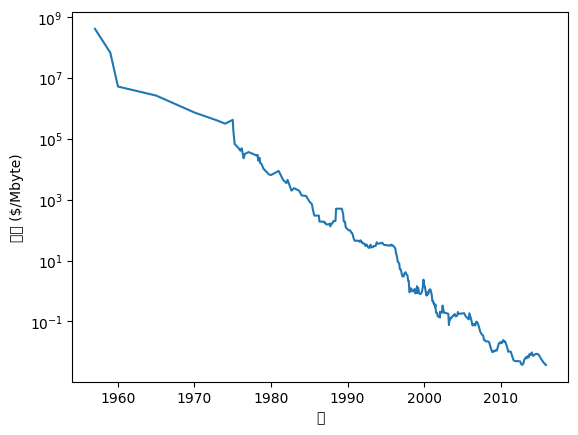

In [183]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#2000년 이전을 훈련 데이터로, 이후를 테스트 데이터로 만든다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#가격 예측을 위해 날짜 특성만을 이용한다.
X_train = data_train.date.to_numpy()[:, np.newaxis]

#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾼다.
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#예측은 전체 기간에 대해서 수향
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

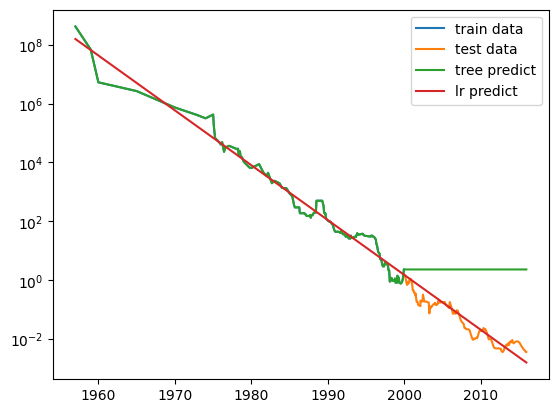

In [185]:
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")

plt.semilogy(ram_prices.date, price_tree, label="tree predict")
plt.semilogy(ram_prices.date, price_lr, label="lr predict")

plt.legend()

In [186]:
### 결정트리 앙상블

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
print(forest.fit(X_train, y_train))

RandomForestClassifier(n_estimators=5, random_state=2)


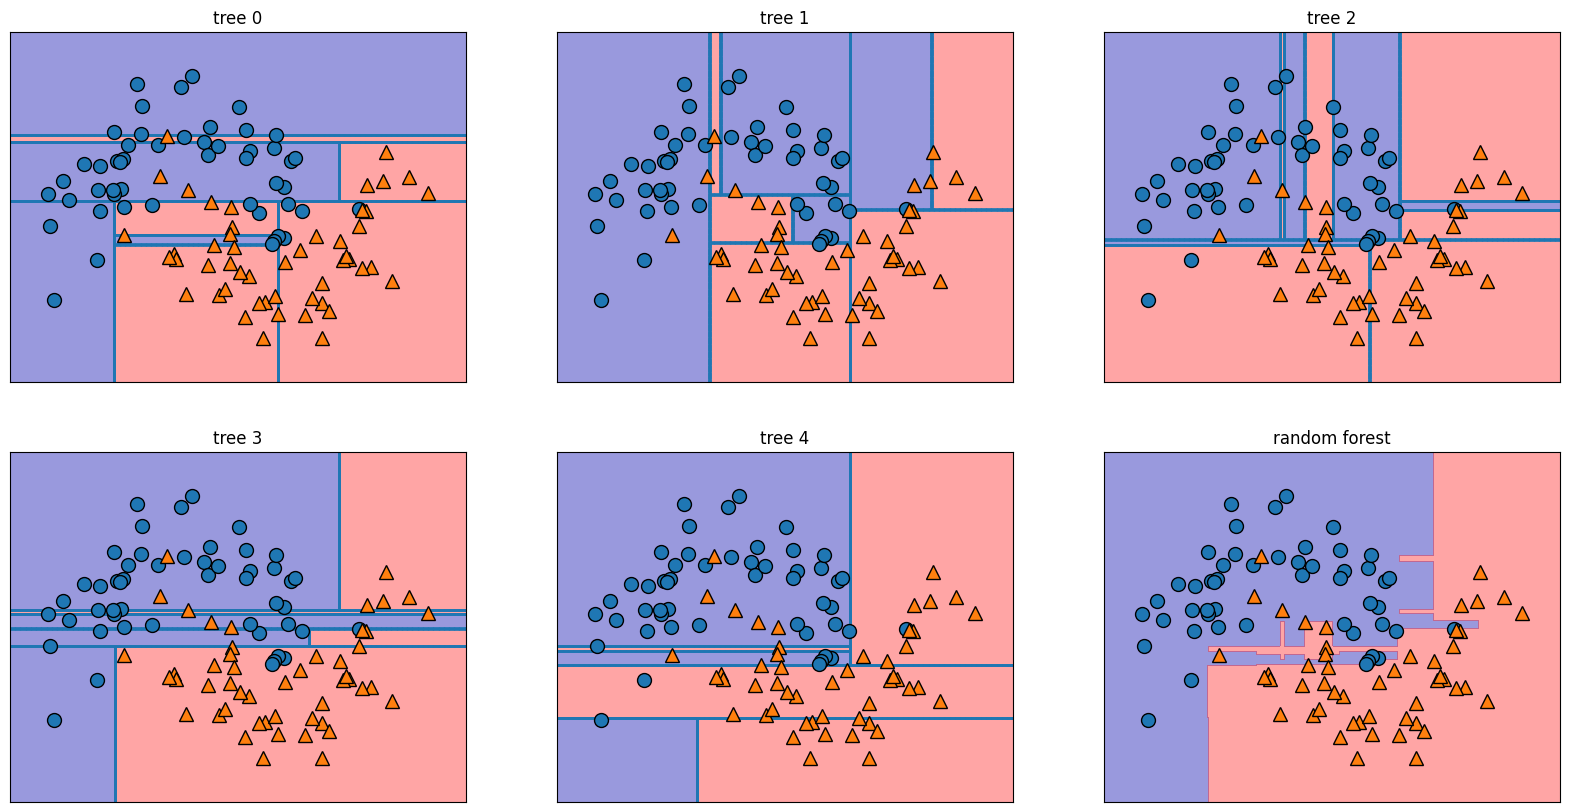

In [188]:
fig, axes= plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("tree {}".format(i))
  mglearn.plots.plot_tree_partition(X,y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax= axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("random forest")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [189]:
X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0) #과대 적합
forest.fit(X_train, y_train)

print("train set acc:{:.3f}".format(forest.score(X_train, y_train)))
print("test set acc:{:.3f}".format(forest.score(X_test, y_test)))

train set acc:1.000
test set acc:0.972


In [190]:
X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(max_depth=7, n_estimators=100, random_state=0) #적합!
forest.fit(X_train, y_train)

print("train set acc:{:.3f}".format(forest.score(X_train, y_train)))
print("test set acc:{:.3f}".format(forest.score(X_test, y_test)))

train set acc:0.998
test set acc:0.979


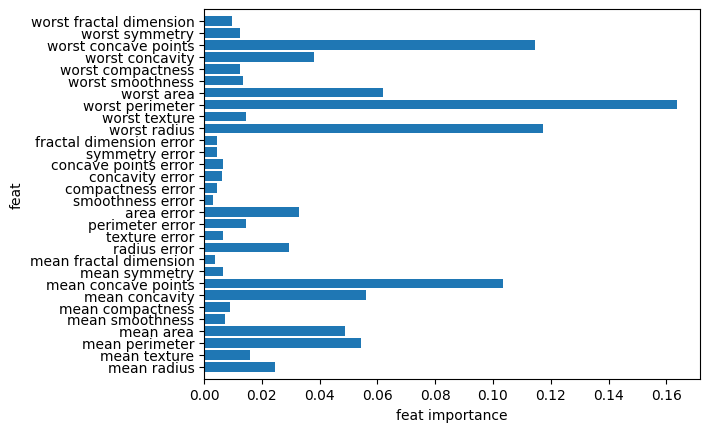

In [191]:
plot_feature_importances_cancer(forest)

In [192]:
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt= GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("train set acc:{:.3f}".format(gbrt.score(X_train, y_train)))
print("test set acc:{:.3f}".format(gbrt.score(X_test, y_test)))

train set acc:1.000
test set acc:0.965


In [193]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.2)
gbrt.fit(X_train, y_train)

print("train set acc:{:.3f}".format(gbrt.score(X_train, y_train)))
print("test set acc:{:.3f}".format(gbrt.score(X_test, y_test)))

train set acc:0.995
test set acc:0.986


In [194]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("train set acc:{:.3f}".format(gbrt.score(X_train, y_train)))
print("test set acc:{:.3f}".format(gbrt.score(X_test, y_test)))

train set acc:0.991
test set acc:0.972


In [195]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.2)
gbrt.fit(X_train, y_train)

print("train set acc:{:.3f}".format(gbrt.score(X_train, y_train)))
print("test set acc:{:.3f}".format(gbrt.score(X_test, y_test)))

train set acc:0.995
test set acc:0.986


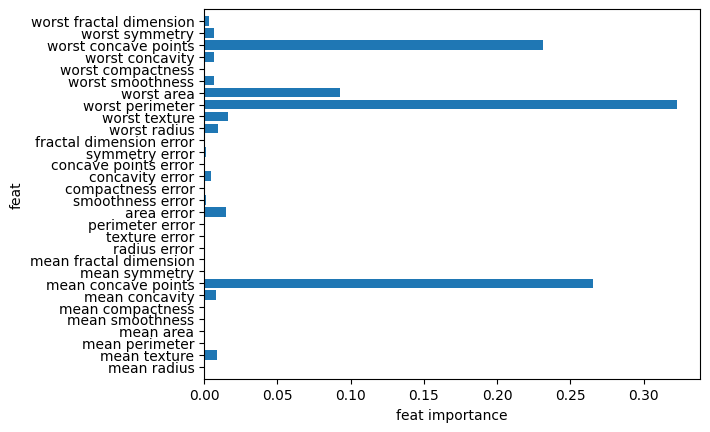

In [196]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [197]:
### 그 외 다른 앙상블

In [205]:
# from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm,ym,stratify=ym, random_state=42)
cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)

bagging.fit(Xc_train, yc_train)

BaggingClassifier(estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [208]:
print("train set acc:{:.3f}".format(bagging.score(Xc_train, yc_train)))
print("test set acc:{:.3f}".format(bagging.score(Xc_test, yc_test)))
print("train set acc:{:.3f}".format(bagging.oob_score_))

train set acc:0.962
test set acc:0.958
train set acc:0.948


In [209]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=5, n_jobs=-1,
                  random_state=42)

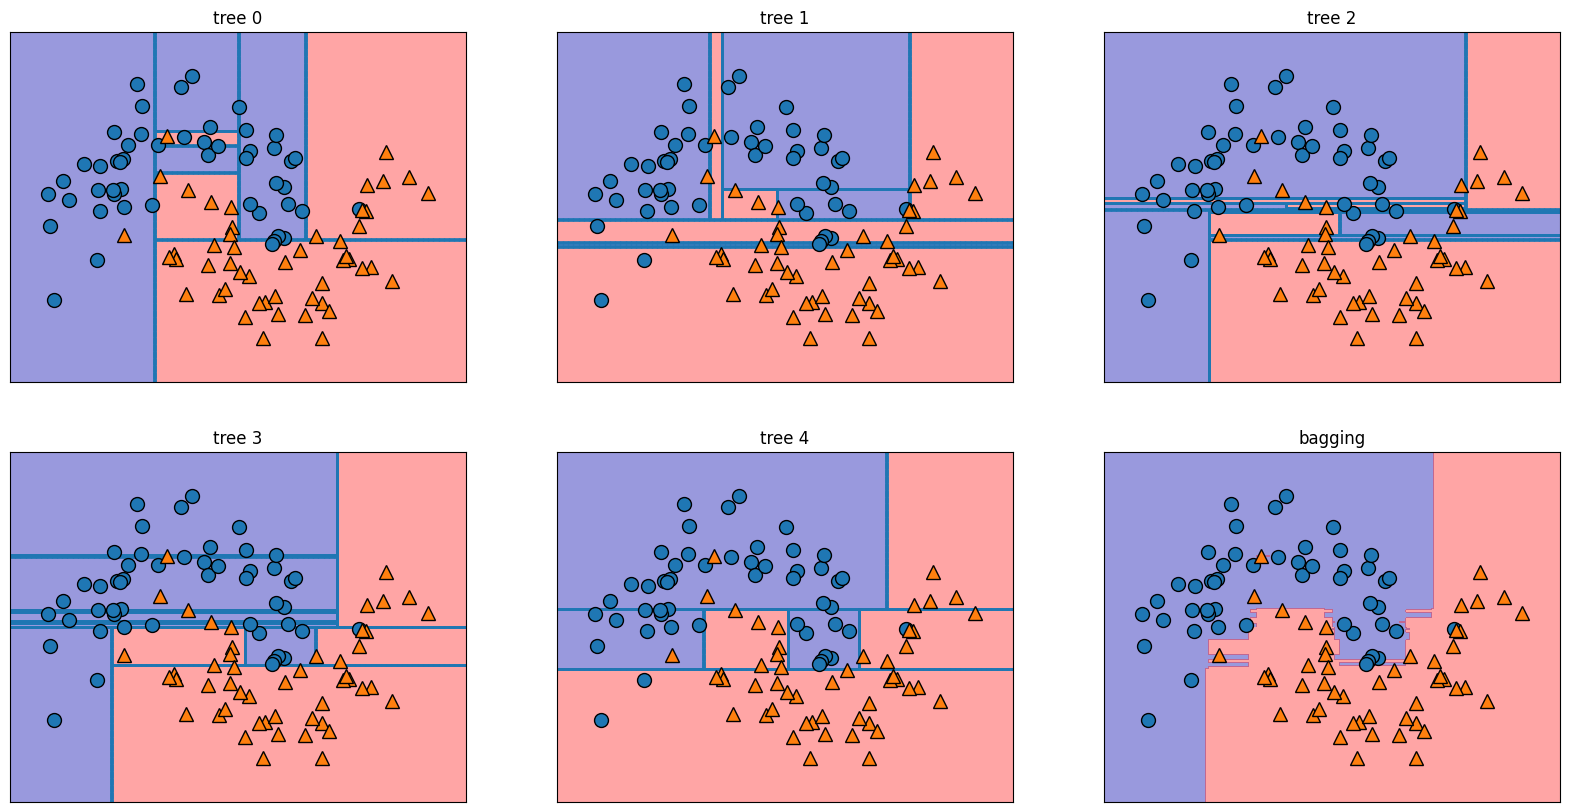

In [210]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
  ax.set_title("tree {}".format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,-1], alpha = .4)
axes[-1,-1].set_title("bagging")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [211]:
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)

bagging.fit(Xc_train, yc_train)

print("train set acc:{:.3f}".format(bagging.score(Xc_train, yc_train)))
print("test set acc:{:.3f}".format(bagging.score(Xc_test, yc_test)))
print("train set acc:{:.3f}".format(bagging.oob_score_))

train set acc:1.000
test set acc:0.965
train set acc:0.948
